In [35]:
import numpy as np
import pandas as pd

In [36]:
# from pymongo import MongoClient

# db = MongoClient('mongodb://localhost/SmartHome', 27017).SmartHome

In [37]:
# table = db.acceleration.find({})

In [38]:
PATH ='C:/Users/ralkh/Desktop/smarthome-master/'

df = pd.read_csv('C:/Users/ralkh/Desktop/smarthome-master/data/train/00001/acceleration.csv')
df.head()

,t,x,y,z,Kitchen_AP,Lounge_AP,Upstairs_AP,Study_AP
0,0.017856,0.944,-0.280,0.152,-93.0,-95.0,-79.0,NaN
1,0.067904,0.944,-0.292,0.156,-93.0,-95.0,-79.0,NaN
2,0.117952,0.946,-0.286,0.156,-93.0,-95.0,-79.0,NaN
3,0.168000,0.942,-0.288,0.160,-93.0,-95.0,-79.0,NaN
4,0.217856,0.946,-0.286,0.158,-90.0,-89.0,-79.0,NaN


In [39]:
df.describe()

,t,x,y,z,Kitchen_AP,Lounge_AP,Upstairs_AP,Study_AP
count,35710.000000,35710.000000,35710.000000,35710.000000,11393.00000,21550.000000,14745.000000,0.0
mean,910.075092,0.400164,-0.403389,0.238920,-78.26174,-77.575452,-84.933198,NaN
std,526.783375,0.538850,0.475885,0.366541,10.83795,8.776482,10.240221,NaN
min,0.017856,-2.002000,-4.096000,-2.640000,-105.00000,-105.000000,-105.000000,NaN
25%,455.517416,-0.032000,-0.804000,0.048000,-83.00000,-81.000000,-93.000000,NaN
50%,908.063928,0.454000,-0.396000,0.176000,-75.00000,-75.000000,-85.000000,NaN
75%,1367.216440,0.920000,-0.170000,0.508000,-71.00000,-72.000000,-77.000000,NaN
max,1823.866952,4.094000,2.108000,2.384000,-60.00000,-63.000000,-54.000000,NaN


In [40]:
df.isnull().sum()

t                  0
x                  0
y                  0
z                  0
Kitchen_AP     24317
Lounge_AP      14160
Upstairs_AP    20965
Study_AP       35710
dtype: int64

In [41]:
# Study_AP has missing values equal to rows count so we have to remove it

x = df.dropna(axis=1, how='all')
x.head()

,t,x,y,z,Kitchen_AP,Lounge_AP,Upstairs_AP
0,0.017856,0.944,-0.280,0.152,-93.0,-95.0,-79.0
1,0.067904,0.944,-0.292,0.156,-93.0,-95.0,-79.0
2,0.117952,0.946,-0.286,0.156,-93.0,-95.0,-79.0
3,0.168000,0.942,-0.288,0.160,-93.0,-95.0,-79.0
4,0.217856,0.946,-0.286,0.158,-90.0,-89.0,-79.0


In [42]:
x.describe()

,t,x,y,z,Kitchen_AP,Lounge_AP,Upstairs_AP
count,35710.000000,35710.000000,35710.000000,35710.000000,11393.00000,21550.000000,14745.000000
mean,910.075092,0.400164,-0.403389,0.238920,-78.26174,-77.575452,-84.933198
std,526.783375,0.538850,0.475885,0.366541,10.83795,8.776482,10.240221
min,0.017856,-2.002000,-4.096000,-2.640000,-105.00000,-105.000000,-105.000000
25%,455.517416,-0.032000,-0.804000,0.048000,-83.00000,-81.000000,-93.000000
50%,908.063928,0.454000,-0.396000,0.176000,-75.00000,-75.000000,-85.000000
75%,1367.216440,0.920000,-0.170000,0.508000,-71.00000,-72.000000,-77.000000
max,1823.866952,4.094000,2.108000,2.384000,-60.00000,-63.000000,-54.000000


In [43]:
# because there are missing values as follows(Kitchen_AP:24317,Lounge_AP:14160 ,Upstairs_AP:20965)
# we fill them in with the mean value

x = x.fillna({'Kitchen_AP':-78.26174 , 'Lounge_AP':-77.575452 , 'Upstairs_AP':-84.933198 })
x.head()

,t,x,y,z,Kitchen_AP,Lounge_AP,Upstairs_AP
0,0.017856,0.944,-0.280,0.152,-93.0,-95.0,-79.0
1,0.067904,0.944,-0.292,0.156,-93.0,-95.0,-79.0
2,0.117952,0.946,-0.286,0.156,-93.0,-95.0,-79.0
3,0.168000,0.942,-0.288,0.160,-93.0,-95.0,-79.0
4,0.217856,0.946,-0.286,0.158,-90.0,-89.0,-79.0


In [44]:
x.isnull().sum()

t              0
x              0
y              0
z              0
Kitchen_AP     0
Lounge_AP      0
Upstairs_AP    0
dtype: int64

In [45]:
x.to_csv(path_or_buf=PATH + '/new_data/Clean_acceleration.csv')

In [46]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

In [47]:
%matplotlib inline
rcParams['figure.figsize'] = 30,5
sb.set_style('whitegrid')

C:\Users\ralkh\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


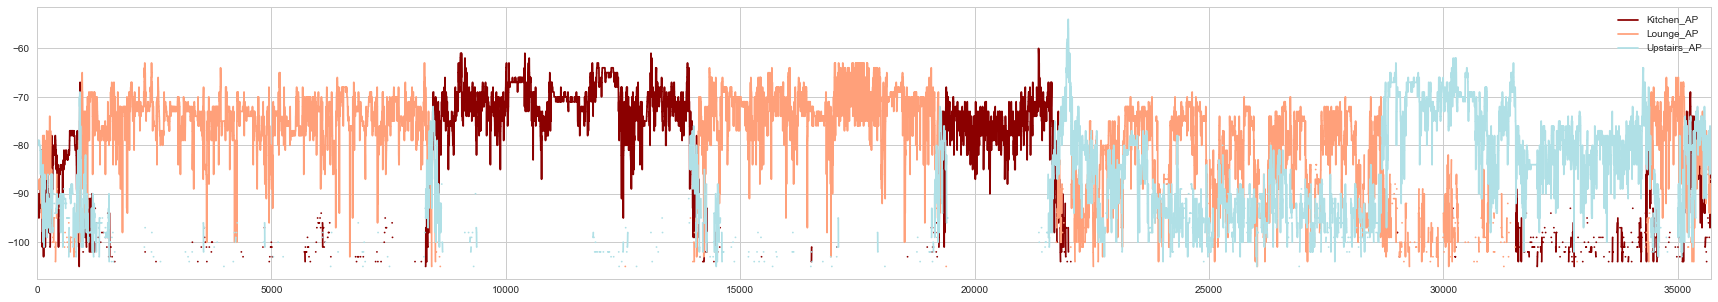

In [48]:
df_set = df_set.sort()
df_set = df[['Kitchen_AP','Lounge_AP','Upstairs_AP']]
color_theme = ['darkred','lightsalmon','powderblue']
df_set.plot(color=color_theme)

C:\Users\ralkh\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


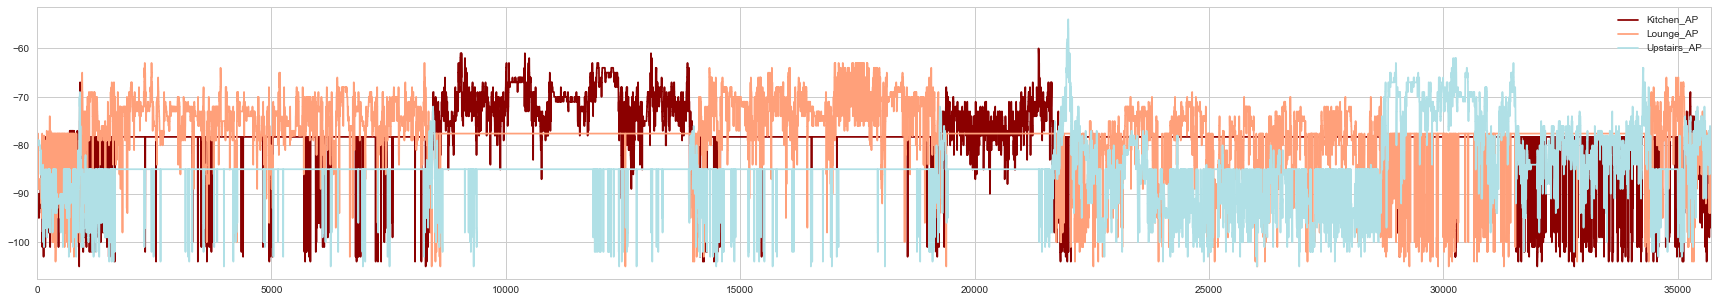

In [49]:
df_set = df_set.sort()
df_set = x[['Kitchen_AP','Lounge_AP','Upstairs_AP']]
color_theme = ['darkred','lightsalmon','powderblue']
df_set.plot(color=color_theme)

In [50]:
x = x.sort(axis=0)

Kitchen_AP = x['Kitchen_AP']
Lounge_AP = x['Lounge_AP']
Upstairs_AP = x['Upstairs_AP']

Movements = []

for i in range(Kitchen_AP.count()):
    minimum = Kitchen_AP[i]
    tag = 'Kitchen_AP'

    if minimum > Lounge_AP[i]:
        minimum = Lounge_AP[i]
        tag = 'Lounge_AP'

    if (minimum > Upstairs_AP[i]):
        minimum = Upstairs_AP[i]
        tag = 'Upstairs_AP'  

    Movements.append(tag)

C:\Users\ralkh\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


In [51]:
from ipywidgets import widgets
from bokeh.models.annotations import Label
from bokeh.plotting import figure, output_file, curdoc,show,output_notebook

In [52]:

def firstfloor_labels(p):
    label = Label(x=0, y=3.9, x_offset=5, text="BATH / SHOWER", text_baseline="middle",border_line_color="red", background_fill_color="blue")
    p.add_layout(label)

    label = Label(x=2.9, y=0.5, x_offset=5, text="BEDROOM 1", text_baseline="middle",border_line_color="red", background_fill_color="blue")
    p.add_layout(label)

    label = Label(x=0.0, y=7.5, x_offset=5, text="BEDROOM 2", text_baseline="middle",border_line_color="red", background_fill_color="blue")
    p.add_layout(label)

    label = Label(x=3.5, y=3.9, x_offset=5, text="LANDING", text_baseline="middle",border_line_color="red", background_fill_color="blue")
    p.add_layout(label)

    label = Label(x=3.9, y=8.8, x_offset=5, text="WC", text_baseline="middle",border_line_color="red", background_fill_color="blue")
    p.add_layout(label)
    
    return p


In [53]:
def groundMap(p):
    x = [1.65, 4.65, 4.65, 0, 0, 1.65, 1.65]
    y = [0, 0, 10.45, 10.45, 3.15, 3.15, 0]

    kitchen_x = [1.65, 4.65, 4.65, 1.65, 1.65]
    kitchen_y = [0, 0, 3.15, 3.15, 0]

    bedRoom_x = [0, 2.9, 2.9, 0, 0]
    bedRoom_y = [3.15, 3.15, 6.75, 6.75, 3.15]

    hall_x = [4.41, 4.65, 4.65, 4.41, 4.41]
    hall_y = [6.75, 6.75, 10.45, 10.45, 6.75]

    lounch_x = [0, 4.41, 4.41, 0, 0]
    lounch_y = [6.75, 6.75, 10.45, 10.45, 6.75]

#     p = figure(plot_width=400, plot_height=400)
    p.patches([x, kitchen_x, bedRoom_x, hall_x, lounch_x],
              [y, kitchen_y, bedRoom_y, hall_y, lounch_y],
              fill_color=['transparent', 'transparent', 'transparent', 'transparent', 'transparent', 'transparent'],
              line_width=2)
    return p
output_notebook()

Loading BokehJS ...

In [54]:
 def ground_labels(p,location):
    label = Label(x=0, y=3.9, x_offset=5, text="BedRoom 1", text_baseline="middle",border_line_color="red", background_fill_color="blue")
    p.add_layout(label)
    
    if location == 'Kitchen_AP':
        label = Label(x=2.9, y=0.5, x_offset=5, text="KITCHEN G.03", text_baseline="middle",border_line_color="blue", background_fill_color="red")
    else:
        label = Label(x=2.9, y=0.5, x_offset=5, text="KITCHEN G.03", text_baseline="middle",border_line_color="red", background_fill_color="blue")
    
    p.add_layout(label)
    
    if location == 'Lounge_AP':
        label = Label(x=0.0, y=7.5, x_offset=5, text="LOUNGE", text_baseline="middle",border_line_color="red", background_fill_color="blue")
    else:
        label = Label(x=0.0, y=7.5, x_offset=5, text="LOUNGE", text_baseline="middle",border_line_color="blue", background_fill_color="red")

    p.add_layout(label)

    # label = Label(x=3.5, y=3.9, x_offset=5, text="LANDING", text_baseline="middle",border_line_color="red", background_fill_color="blue")
    # p.add_layout(label)

    label = Label(x=4.2, y=7.5, x_offset=5, text="HALL", text_baseline="middle",border_line_color="red", background_fill_color="blue")
    p.add_layout(label)
    show(p)
    return p

In [55]:

def Moves(x):
    minimum = Kitchen_AP[x]
    tag = 'Kitchen_AP'
    
    if minimum > Lounge_AP[x]:
        minimum = Lounge_AP[x]
        tag = 'Lounge_AP'

    if (minimum > Upstairs_AP[x]):
        minimum = Upstairs_AP[x]
        tag = 'Upstairs_AP'
                
    print (tag)  
    
    map_x = [1.65, 4.65, 4.65, 0, 0, 1.65, 1.65]
    map_y = [0, 0, 10.45, 10.45, 3.15, 3.15, 0]

    kitchen_x = [1.65, 4.65, 4.65, 1.65, 1.65]
    kitchen_y = [0, 0, 3.15, 3.15, 0]

    bedRoom_x = [0, 2.9, 2.9, 0, 0]
    bedRoom_y = [3.15, 3.15, 6.75, 6.75, 3.15]

    hall_x = [4.41, 4.65, 4.65, 4.41, 4.41]
    hall_y = [6.75, 6.75, 10.45, 10.45, 6.75]

    lounch_x = [0, 4.41, 4.41, 0, 0]
    lounch_y = [6.75, 6.75, 10.45, 10.45, 6.75]

    p = figure(plot_width=400, plot_height=400)
    p.patches([map_x, kitchen_x, bedRoom_x, hall_x, lounch_x],
              [map_y, kitchen_y, bedRoom_y, hall_y, lounch_y],
              fill_color=['transparent', 'transparent', 'transparent', 'transparent', 'transparent', 'transparent'],
              line_width=2)

    label = Label(x=0, y=3.9, x_offset=5, text="BedRoom 1", text_baseline="middle",border_line_color="red", background_fill_color="blue")
    p.add_layout(label)

    if tag != 'Kitchen_AP':
        label = Label(x=2.9, y=0.5, x_offset=5, text="KITCHEN G.03", text_baseline="middle",border_line_color="red", background_fill_color="blue")
    else:
        label = Label(x=2.9, y=0.5, x_offset=5, text="KITCHEN G.03", text_baseline="middle",border_line_color="blue", background_fill_color="red")

    p.add_layout(label)

    if tag != 'Lounge_AP':
        label = Label(x=0.0, y=7.5, x_offset=5, text="LOUNGE", text_baseline="middle",border_line_color="red", background_fill_color="blue")
    else:
        label = Label(x=0.0, y=7.5, x_offset=5, text="LOUNGE", text_baseline="middle",border_line_color="blue", background_fill_color="red")

    p.add_layout(label)

    if tag == 'Upstairs_AP':
        label = Label(x=3., y=3.9, x_offset=5, text="UP Staris", text_baseline="middle",border_line_color="blue", background_fill_color="red")
        p.add_layout(label)

    label = Label(x=4.2, y=7.5, x_offset=5, text="HALL", text_baseline="middle",border_line_color="red", background_fill_color="blue")
    p.add_layout(label)

    show(p)
        

In [56]:
# for i in range(Kitchen_AP.count()):
# widgets.interact(Moves,x=100)
widgets.interact(Moves, x=widgets.IntSlider(min=1,max=Kitchen_AP.count()-1,step=1,value=1));

Lounge_AP


C:\Users\ralkh\Anaconda3\lib\site-packages\bokeh\models\sources.py:89: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))


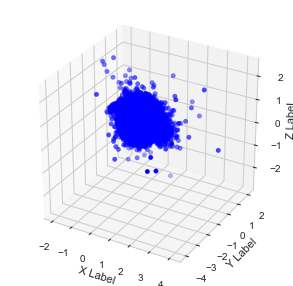

In [57]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

rcParams['figure.figsize'] = 5,5
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=x.x, ys=x.y, zs=x.z, c='b', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()